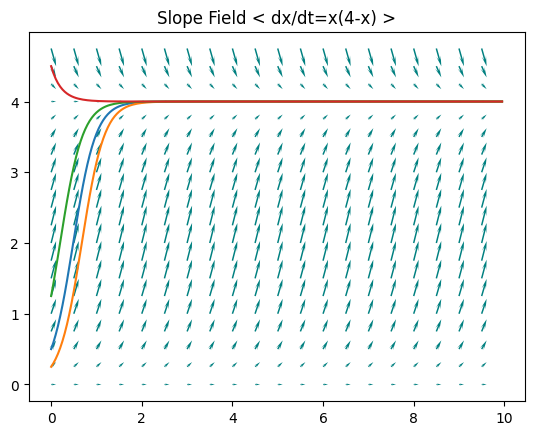

In [5]:
import numpy as np
from chaotick import runge_kutta_4 as rk4
import chaotick
  
def logistic_equation(X):
    return X * (4 - X)  

eqn_label = 'x(4-x)'
x_interval = [0, 10]
y_interval = [0, 5]
step = 0.05
init_vals = [0.5, 0.25, 1.25, 4.5]

x = np.arange(x_interval[0], x_interval[1], step)
curves = []
for init_val in init_vals:
    y = rk4(logistic_equation, step=step, init_val=init_val)
    curves.append([x,y])

plt = chaotick.plot_slope_field(x_interval, y_interval, logistic_equation, normalized=False, curves=curves, title='Slope Field < dx/dt=%s >' % eqn_label)